# Logarithmic Potential Activation Function (LPAF)

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Define the Activation Function and its Derivative 

In [2]:
def lpaf(x):
    """Logarithmic Potential Activation Function."""
    return x * np.log(1 + x**2)

def lpaf_derivative(x):
    """Derivative of the Logarithmic Potential Activation Function."""
    return np.log(1 + x**2) + (2 * x**2) / (1 + x**2)


### Modefied LPAF

In [7]:
def lpaf(x):
    """Modified LPAF with scaling and bounding."""
    alpha = 0.1  # Scaling factor
    return tf.math.tanh(alpha * x * tf.math.log(1 + x**2))


### Visualize the Activation Function

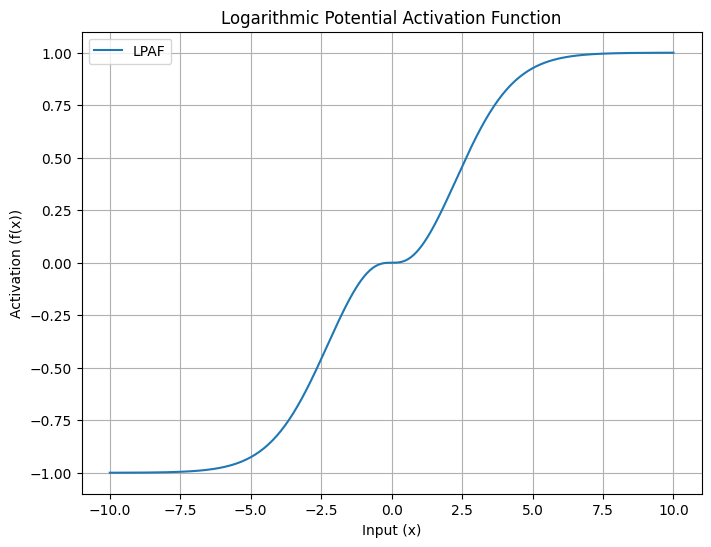

In [8]:
# Define the range of input values
x = np.linspace(-10, 10, 400)

# Compute the activation values
y = lpaf(x)

# Plot the activation function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='LPAF')
plt.title('Logarithmic Potential Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Activation (f(x))')
plt.grid(True)
plt.legend()
plt.show()


### Visualize the Derivative

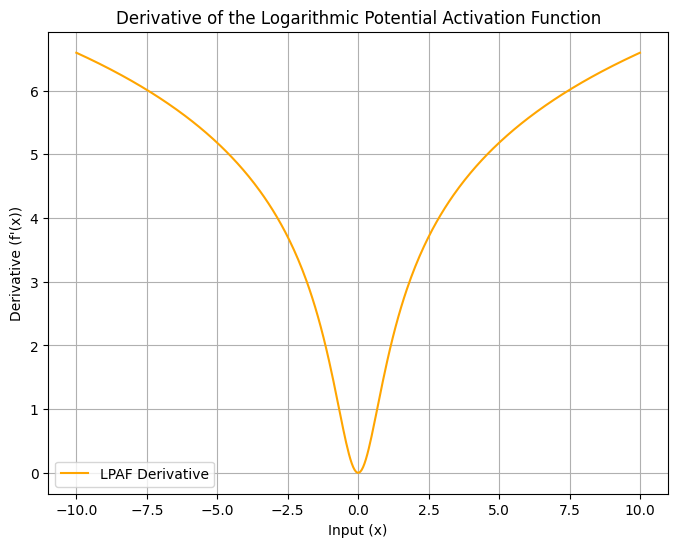

In [4]:
# Compute the derivative values
y_derivative = lpaf_derivative(x)

# Plot the derivative of the activation function
plt.figure(figsize=(8, 6))
plt.plot(x, y_derivative, label="LPAF Derivative", color='orange')
plt.title('Derivative of the Logarithmic Potential Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Derivative (f\'(x))')
plt.grid(True)
plt.legend()
plt.show()


# Train on CIFAR-10 dataset 

## Modified LPAF with scaling and bounding

Training with ReLU activation
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.4994 - loss: 1.4313Epoch 1 completed in 144.28 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 174ms/step - accuracy: 0.4995 - loss: 1.4310 - val_accuracy: 0.5755 - val_loss: 1.2164
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.7310 - loss: 0.7738Epoch 2 completed in 137.84 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 138s 176ms/step - accuracy: 0.7310 - loss: 0.7738 - val_accuracy: 0.5751 - val_loss: 1.3118
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8035 - loss: 0.5698Epoch 3 completed in 172.70 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.8035 - loss: 0.5698 - val_accuracy: 0.6928 - val_loss: 0.9180
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.8563 - loss: 0.4300Epoch 4 completed in 203.60 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 260ms/step - accuracy: 0.8563 - loss: 0.4300 - val_accuracy: 0.7134 - val_loss: 0


Training with LPAF activation
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3765 - loss: 1.7875Epoch 1 completed in 250.29 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 250s 305ms/step - accuracy: 0.3766 - loss: 1.7872 - val_accuracy: 0.5599 - val_loss: 1.3033
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.6302 - loss: 1.0720Epoch 2 completed in 268.60 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 269s 343ms/step - accuracy: 0.6302 - loss: 1.0720 - val_accuracy: 0.6397 - val_loss: 1.0514
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.7147 - loss: 0.8283Epoch 3 completed in 267.42 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 267s 342ms/step - accuracy: 0.7147 - loss: 0.8283 - val_accuracy: 0.6261 - val_loss: 1.1400
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.7723 - loss: 0.6726Epoch 4 completed in 280.02 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 280s 358ms/step - accuracy: 0.7723 - loss: 0.6726 - val_accuracy: 0.6796 - val_loss: 


Comparing Results:
Final Training Accuracy with ReLU: 0.989799976348877
Final Validation Accuracy with ReLU: 0.7276999950408936
Final Training Accuracy with LPAF: 0.9722999930381775
Final Validation Accuracy with LPAF: 0.6901999711990356

Visualizing feature maps for ReLU model
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


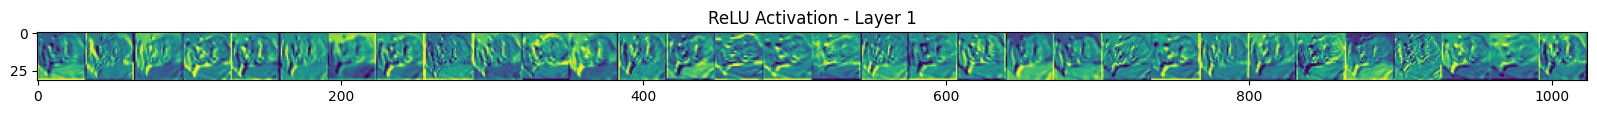

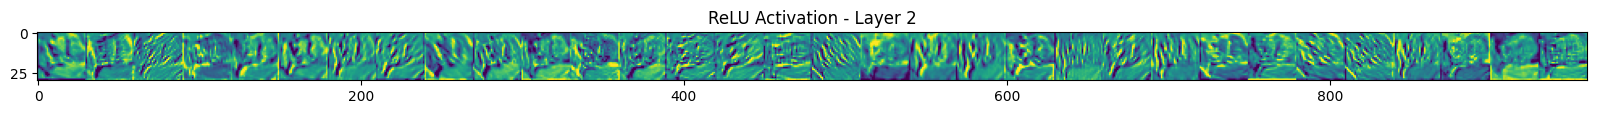

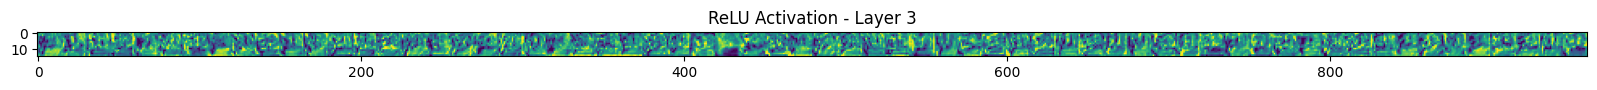

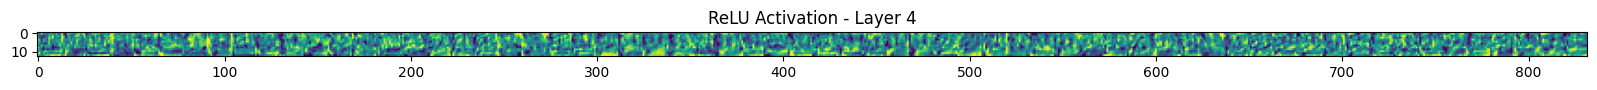


Visualizing feature maps for LPAF model
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


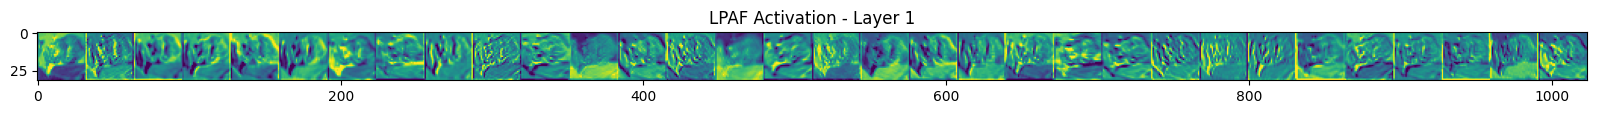

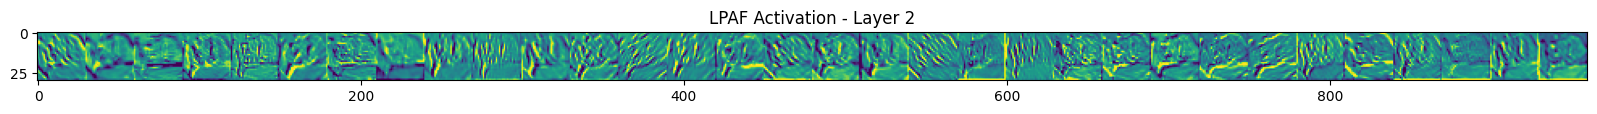

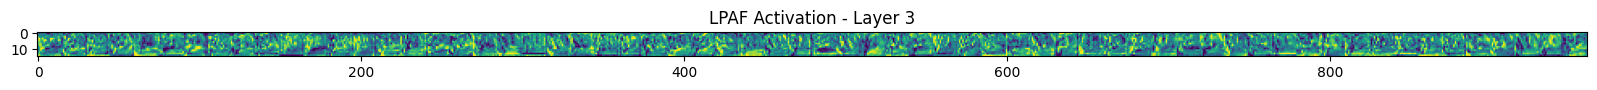

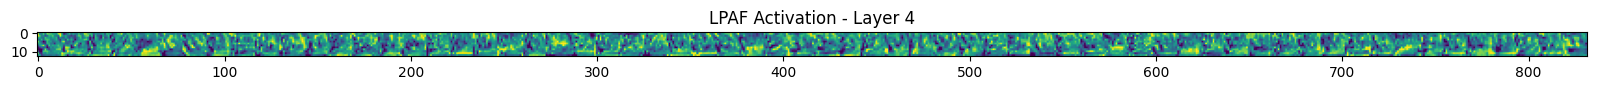

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Lambda, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import numpy as np
import time
import matplotlib.pyplot as plt

# Set hyperparameters
batch_size = 64
learning_rate = 0.0005  # Reduced learning rate
epochs = 20
num_classes = 10

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define modified activation function LPAF
def lpaf(x):
    """Modified LPAF with scaling and bounding."""
    alpha = 0.1  # Scaling factor
    return tf.math.tanh(alpha * x * tf.math.log(1 + x**2))

# Define a custom callback to measure training time per epoch
class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)
        print(f"Epoch {epoch+1} completed in {self.times[-1]:.2f} seconds")

# Function to add activation layers
def add_activation(model, activation_function):
    if activation_function == 'relu':
        model.add(Activation('relu'))
    else:
        model.add(Lambda(activation_function))

# Function to build CNN model with specified activation function
def build_model(activation_function):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

# Training with ReLU activation
print("Training with ReLU activation")
model_relu = build_model('relu')
optimizer = Adam(learning_rate=learning_rate)
model_relu.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
time_callback = TimeHistory()
history_relu = model_relu.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              shuffle=True,
                              callbacks=[time_callback])

# Save the ReLU model
model_relu.save('model_relu.h5')

# Training with LPAF activation
print("\nTraining with LPAF activation")
def lpaf_activation(x):
    return lpaf(x)

model_lpaf = build_model(lpaf_activation)
optimizer = Adam(learning_rate=learning_rate)
model_lpaf.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
time_callback_lpaf = TimeHistory()
history_lpaf = model_lpaf.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              shuffle=True,
                              callbacks=[time_callback_lpaf])

# Save the LPAF model
model_lpaf.save('model_lpaf.h5')

# Compare results
print("\nComparing Results:")
print("Final Training Accuracy with ReLU:", history_relu.history['accuracy'][-1])
print("Final Validation Accuracy with ReLU:", history_relu.history['val_accuracy'][-1])
print("Final Training Accuracy with LPAF:", history_lpaf.history['accuracy'][-1])
print("Final Validation Accuracy with LPAF:", history_lpaf.history['val_accuracy'][-1])

# Visualize feature maps layerwise for both models
def visualize_feature_maps(model, activation_function_name):
    # Choose an image to visualize
    test_image = x_test[0]
    test_image_expanded = np.expand_dims(test_image, axis=0)
    # Get outputs of the convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    # Get the input tensor from the first layer
    input_img = model.layers[0].input
    # Create a model that will return the outputs given the inputs
    activation_model = Model(inputs=input_img, outputs=layer_outputs)
    activations = activation_model.predict(test_image_expanded)
    # Visualize the feature maps
    for idx, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]
        display_grid = np.zeros((size, size * num_filters))
        for i in range(num_filters):
            x = activation[0, :, :, i]
            x -= x.mean()
            x /= (x.std() + 1e-5)
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / num_filters
        plt.figure(figsize=(scale * num_filters, scale))
        plt.title(f'{activation_function_name} Activation - Layer {idx+1}')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()

# Visualize feature maps for ReLU model
print("\nVisualizing feature maps for ReLU model")
visualize_feature_maps(model_relu, "ReLU")

# Visualize feature maps for LPAF model
print("\nVisualizing feature maps for LPAF model")
visualize_feature_maps(model_lpaf, "LPAF")


### Change model

Training with ReLU activation
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.4039 - loss: 1.8856Epoch 1 completed in 213.54 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 214s 260ms/step - accuracy: 0.4040 - loss: 1.8853 - val_accuracy: 0.5067 - val_loss: 1.5860
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.6185 - loss: 1.2007Epoch 2 completed in 207.09 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 265ms/step - accuracy: 0.6185 - loss: 1.2007 - val_accuracy: 0.6686 - val_loss: 1.0902
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.6917 - loss: 1.0086Epoch 3 completed in 212.10 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 212s 271ms/step - accuracy: 0.6917 - loss: 1.0086 - val_accuracy: 0.6501 - val_loss: 1.1798
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - accuracy: 0.7314 - loss: 0.8951Epoch 4 completed in 215.85 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 276ms/step - accuracy: 0.7314 - loss: 0.8951 - val_accuracy: 0.6969 - val_los


Training with LPAF activation
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.3278 - loss: 1.9945Epoch 1 completed in 288.06 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 288s 359ms/step - accuracy: 0.3279 - loss: 1.9942 - val_accuracy: 0.4896 - val_loss: 1.5422
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5588 - loss: 1.3763Epoch 2 completed in 279.11 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 279s 357ms/step - accuracy: 0.5589 - loss: 1.3763 - val_accuracy: 0.5311 - val_loss: 1.6389
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6505 - loss: 1.1353Epoch 3 completed in 278.72 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 279s 356ms/step - accuracy: 0.6506 - loss: 1.1353 - val_accuracy: 0.6643 - val_loss: 1.1151
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6968 - loss: 1.0069Epoch 4 completed in 280.13 seconds
782/782 ━━━━━━━━━━━━━━━━━━━━ 280s 358ms/step - accuracy: 0.6968 - loss: 1.0069 - val_accuracy: 0.6906 - val_lo


Comparing Results:
Final Training Accuracy with ReLU: 0.9073399901390076
Final Validation Accuracy with ReLU: 0.7907000184059143
Final Training Accuracy with LPAF: 0.7853999733924866
Final Validation Accuracy with LPAF: 0.7146000266075134

Visualizing feature maps for ReLU model
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step


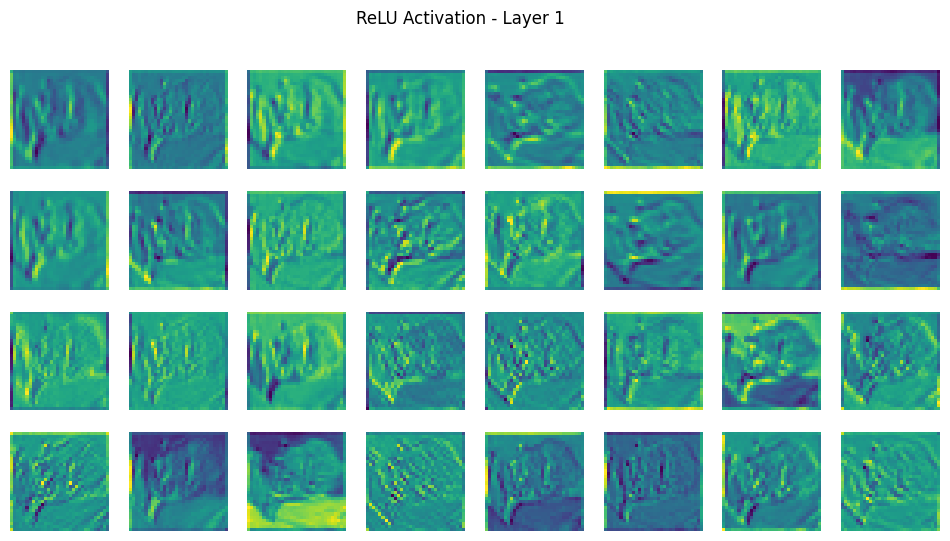

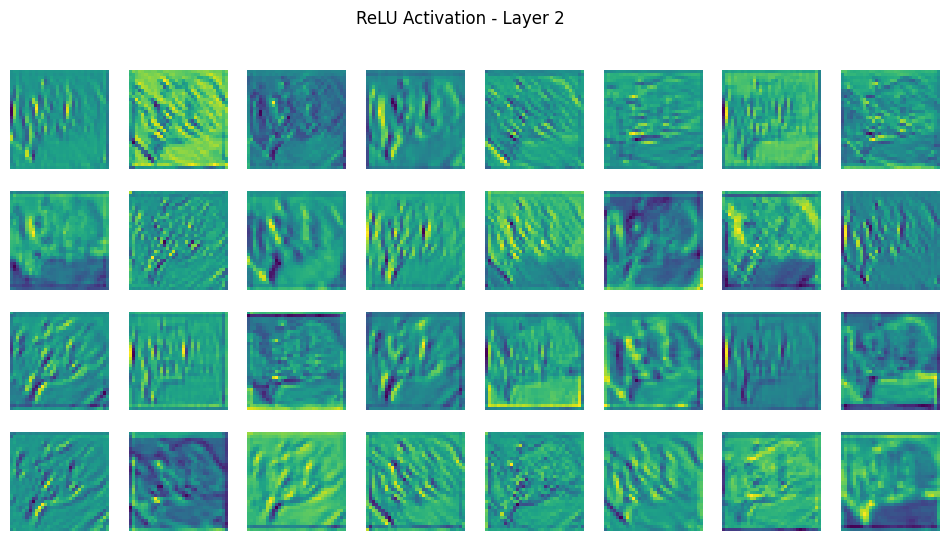

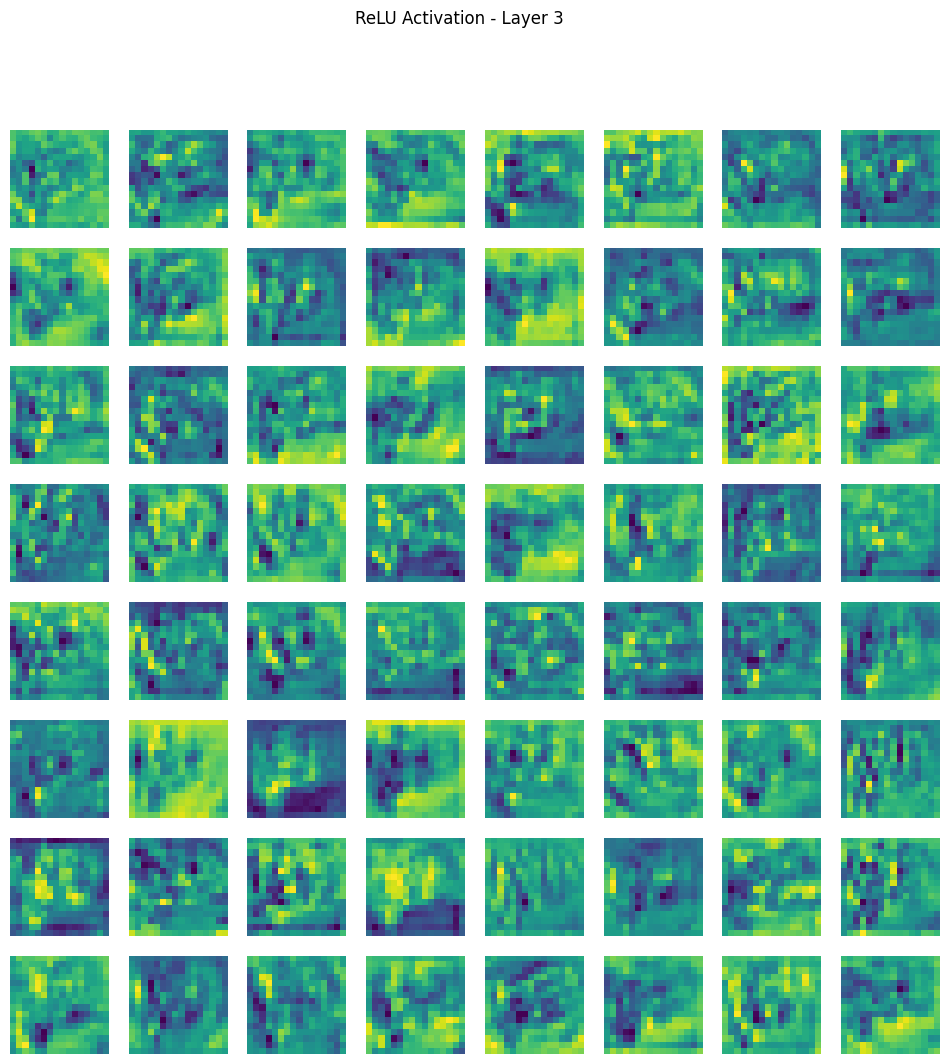

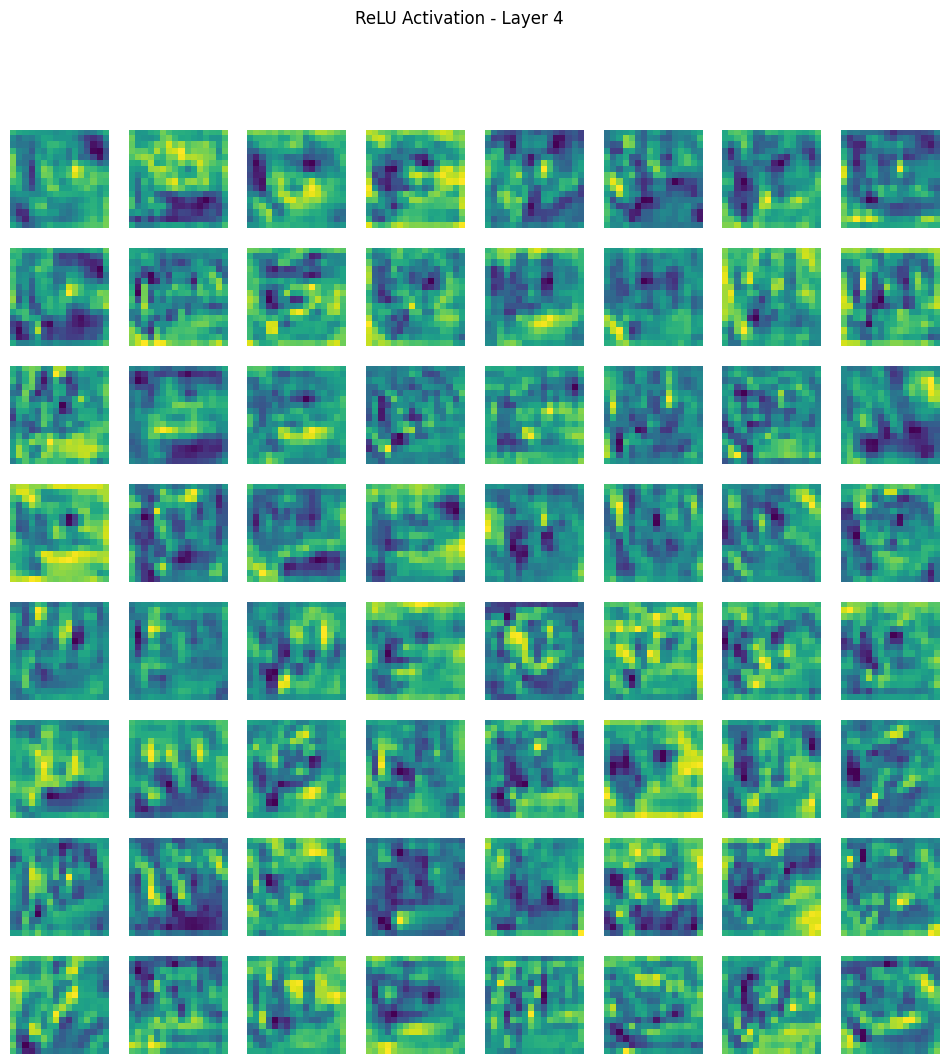


Visualizing feature maps for LPAF model
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


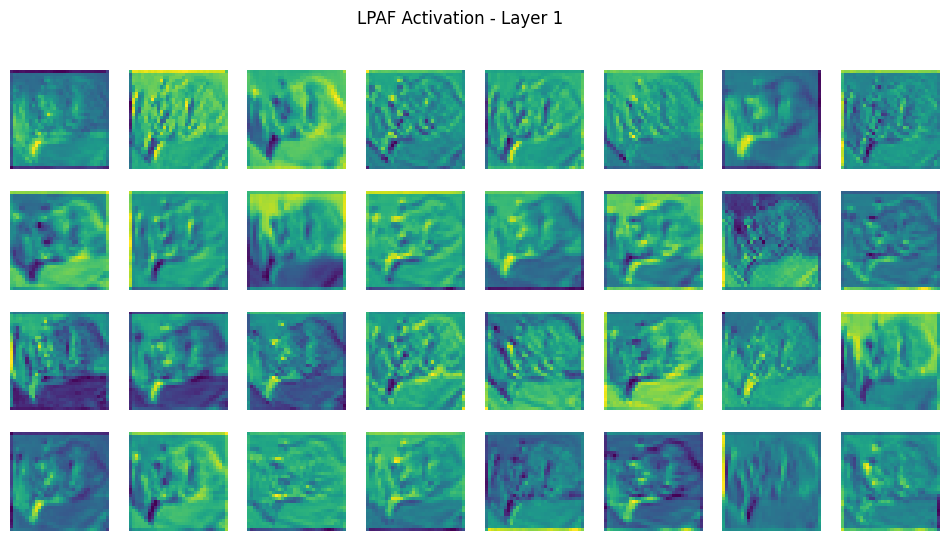

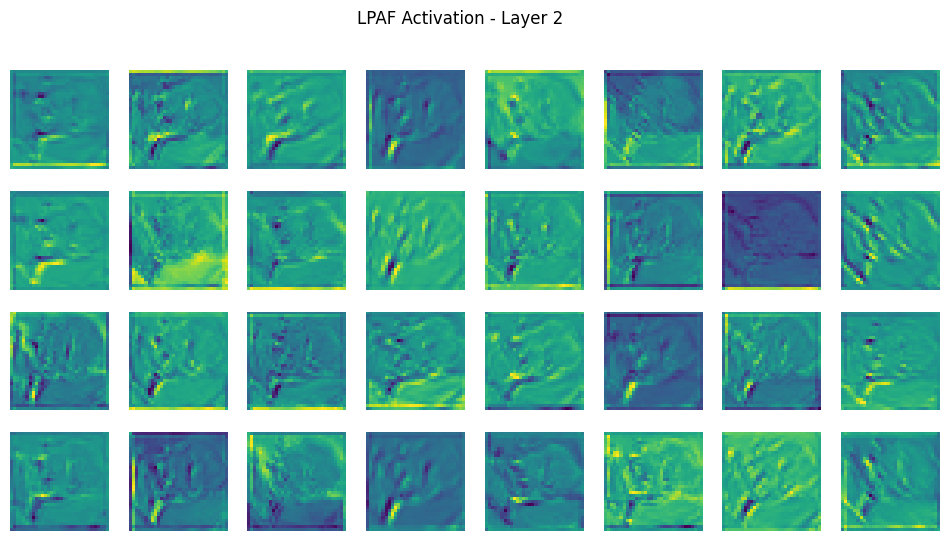

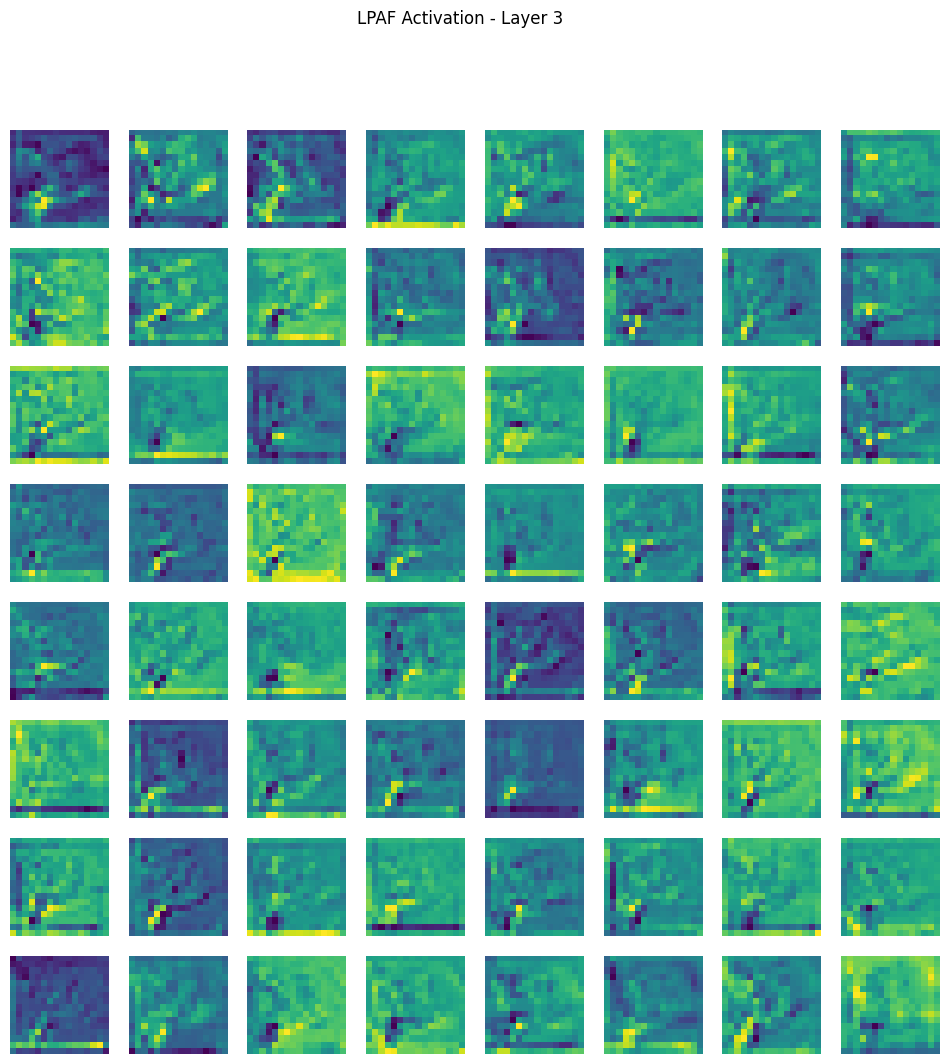

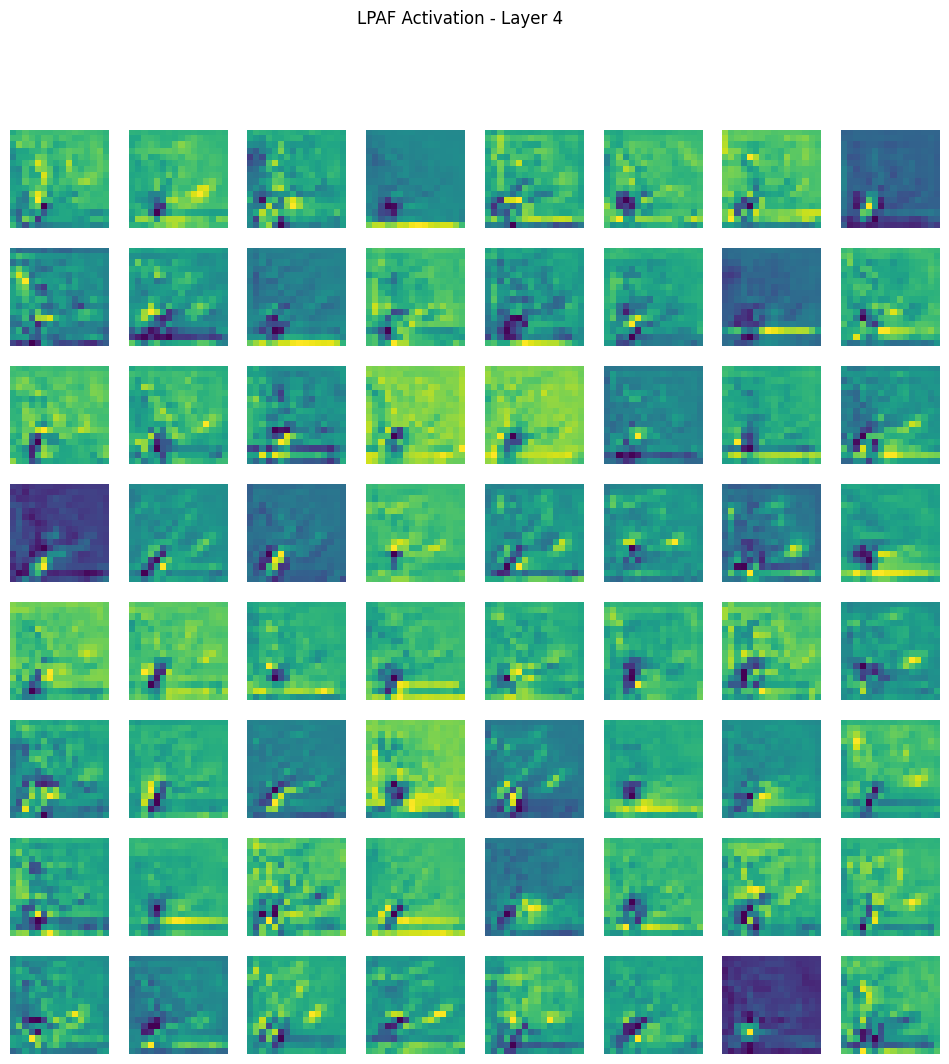

In [10]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Lambda, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.regularizers import l2
import numpy as np
import time
import matplotlib.pyplot as plt

# Set hyperparameters
batch_size = 64
learning_rate = 0.0005
epochs = 100
num_classes = 10

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define modified activation function LPAF
def lpaf(x):
    """Modified LPAF with scaling and bounding."""
    alpha = 0.1  # Scaling factor
    return tf.math.tanh(alpha * x * tf.math.log(1 + x**2))

# Define a custom callback to measure training time per epoch
class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.times = []
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_time_start = time.time()
    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_time_start)
        print(f"Epoch {epoch+1} completed in {self.times[-1]:.2f} seconds")

# Function to add activation layers
def add_activation(model, activation_function):
    if activation_function == 'relu':
        model.add(Activation('relu'))
    else:
        model.add(Lambda(activation_function))

# Function to build CNN model with specified activation function
def build_model(activation_function):
    weight_decay = 1e-4  # L2 regularization factor
    model = Sequential()
    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(weight_decay), input_shape=x_train.shape[1:]))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(Dropout(0.2))
    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(Dropout(0.3))
    # Fourth Convolutional Block
    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=l2(weight_decay)))
    model.add(BatchNormalization())
    add_activation(model, activation_function)
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training with ReLU activation
print("Training with ReLU activation")
model_relu = build_model('relu')
optimizer = Adam(learning_rate=learning_rate)
model_relu.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
time_callback = TimeHistory()
history_relu = model_relu.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              shuffle=True,
                              callbacks=[time_callback, early_stopping])

# Save the ReLU model
model_relu.save('model_relu.h5')

# Training with LPAF activation
print("\nTraining with LPAF activation")
def lpaf_activation(x):
    return lpaf(x)

model_lpaf = build_model(lpaf_activation)
optimizer = Adam(learning_rate=learning_rate)
model_lpaf.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
time_callback_lpaf = TimeHistory()
history_lpaf = model_lpaf.fit(x_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              validation_data=(x_test, y_test),
                              shuffle=True,
                              callbacks=[time_callback_lpaf, early_stopping])

# Save the LPAF model
model_lpaf.save('model_lpaf.h5')

# Compare results
print("\nComparing Results:")
print("Final Training Accuracy with ReLU:", history_relu.history['accuracy'][-1])
print("Final Validation Accuracy with ReLU:", history_relu.history['val_accuracy'][-1])
print("Final Training Accuracy with LPAF:", history_lpaf.history['accuracy'][-1])
print("Final Validation Accuracy with LPAF:", history_lpaf.history['val_accuracy'][-1])

# Visualize feature maps layerwise for both models
def visualize_feature_maps(model, activation_function_name):
    # Choose an image to visualize
    test_image = x_test[0]
    test_image_expanded = np.expand_dims(test_image, axis=0)
    # Get outputs of the convolutional layers
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    # Get the input tensor from the first layer
    input_img = model.layers[0].input
    # Create a model that will return the outputs given the inputs
    activation_model = Model(inputs=input_img, outputs=layer_outputs)
    activations = activation_model.predict(test_image_expanded)
    # Visualize the feature maps
    for idx, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]
        n_cols = 8
        n_rows = num_filters // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*1.5, n_rows*1.5))
        for i in range(num_filters):
            row = i // n_cols
            col = i % n_cols
            ax = axes[row][col]
            ax.imshow(activation[0, :, :, i], cmap='viridis')
            ax.axis('off')
        plt.suptitle(f'{activation_function_name} Activation - Layer {idx+1}')
        plt.show()

# Visualize feature maps for ReLU model
print("\nVisualizing feature maps for ReLU model")
visualize_feature_maps(model_relu, "ReLU")

# Visualize feature maps for LPAF model
print("\nVisualizing feature maps for LPAF model")
visualize_feature_maps(model_lpaf, "LPAF")
